In [1]:
# Basemap 툴킷
%matplotlib inline
import PIL, numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


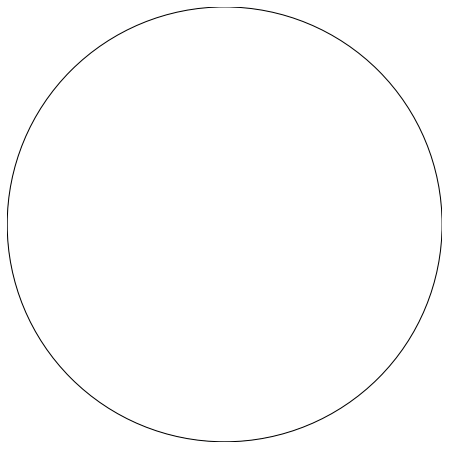

In [2]:
plt.figure(figsize=(8,8))
m = Basemap(projection="ortho", resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


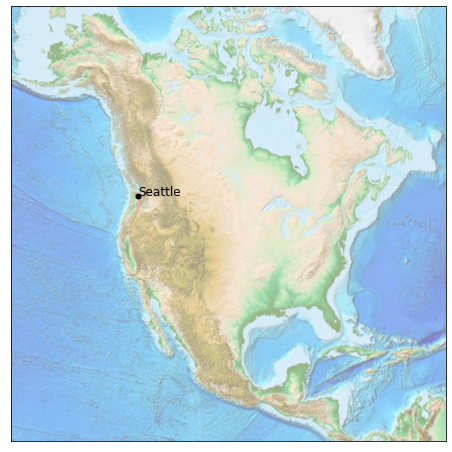

In [3]:
# 지도 배경으로 육지와 해양의 지형 특성을 보여주는 etopo
fig = plt.figure(figsize=(8,8))
m = Basemap(projection="lcc", resolution=None,
            width=8E6, height=8E6,
            lat_0=45, lon_0=-100)
m.etopo(scale=0.5, alpha=0.5)

# 플로팅하기 위해 (long, lat)를 (x, y)에 매핑
x, y = m(-122.3, 47.6)
plt.plot(x, y, "ok", markersize=5)
plt.text(x, y, "Seattle", fontsize=12);

In [4]:
# 지도 투영법(Map Projections)
from itertools import chain

# 경선과 위선이 있는 세계지도 그리는 편의 루틴 정의
def draw_map(m, scale=0.2):
    # 음영 처리된 이미지를 그림
    m.shadedrelief(scale=scale)
    
    # 위도와 경도가 딕셔너리로 반환됨
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))
    
    # 키는 plt.Line2D 인스턴스를 포함
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # 이 선을 따라 돌면서 원하는 스타일을 설정
    for line in all_lines:
        line.set(linestyle="-", alpha=0.3, color="w")

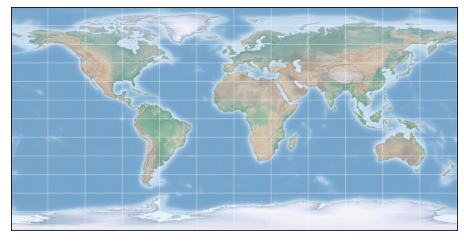

In [5]:
# 원통도법 (cylindrical projection)
fig = plt.figure(figsize=(8, 6), edgecolor="w")
m = Basemap(projection="cyl", resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

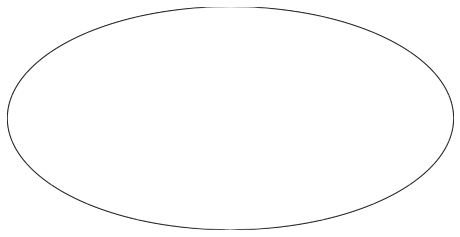

In [6]:
# 의원통도법 (pseudo-cylindrical projection)
fig = plt.figure(figsize=(8, 6), edgecolor="w")
m = Basemap(projection="moll", resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

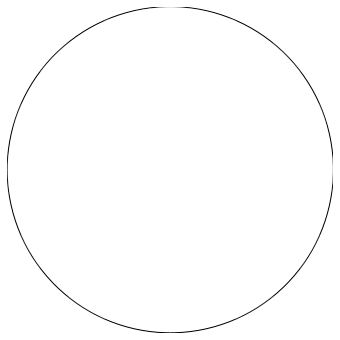

In [7]:
# 투시도법 (perspective projections)
fig = plt.figure(figsize=(8,6))
m = Basemap(projection="ortho", resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

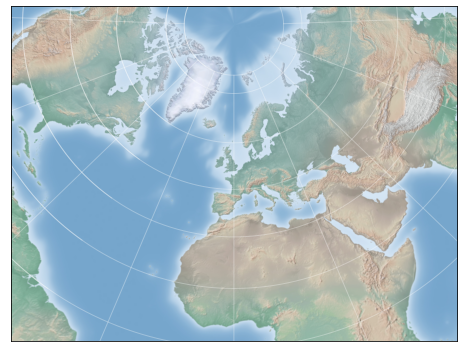

In [8]:
# 원추도법 (conic projection)
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection="lcc", resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m);

In [9]:
# 지도 배경 그리기
# 물리적 경계선과 수면
# 행정구역 경계선
# 지도 특징
# 전체 지구 이미지
# ...

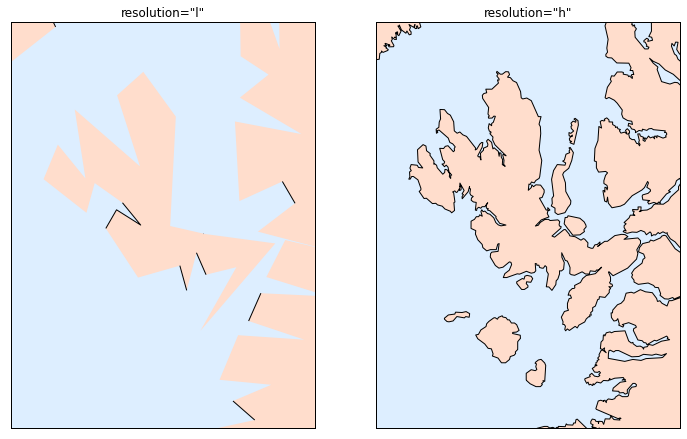

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(12,8))

for i, res in enumerate(["l", "h"]):
    m = Basemap(projection="gnom", lat_0=57.3, lon_0=-6.2,
                width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC", lake_color="#DDEEFF")
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution=\"{0}\"".format(res));

In [11]:
# 지도상에 데이터 플롯하기

# 예제: 캘리포니아 도시
import pandas as pd
cities = pd.read_csv("california_cities.csv")

# 관심있는 데이터 추출
lat = cities["latd"].values
lon = cities["longd"].values
population = cities["population_total"].values
area = cities["area_total_km2"].values

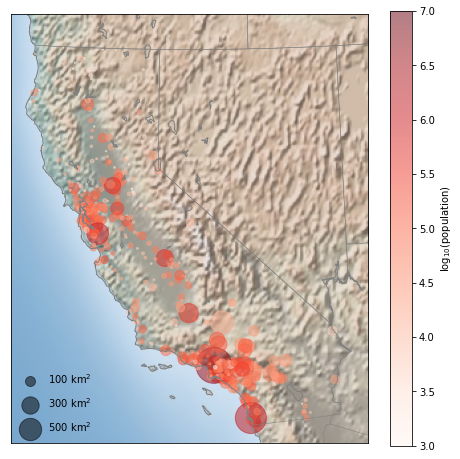

In [12]:
# 1. 지도 배경 그리기
fig = plt.figure(figsize=(8,8))
m = Basemap(projection="lcc", resolution="h",
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color="gray")
m.drawcountries(color="gray")
m.drawstates(color="gray")

# 2. 도시 데이터 산포, 인구는 색상에 반영
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap="Reds", alpha=0.5)

# 색상 막대와 범례 만들기
plt.colorbar(label=r"$\log_{10}({\rm population})$")
plt.clim(3, 7)

# 가짜점으로 범례 만들기
for a in [100, 300, 500]:
    plt.scatter([], [], c="k", alpha=0.5, s=a,
                label=str(a) + " km$^2$")
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc="lower left");

C:\Users\Jimmy Son\AppData\Local\Temp\ipykernel_5096\1795683019.py:21: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  m.pcolormesh(lon, lat, temp_anomaly,


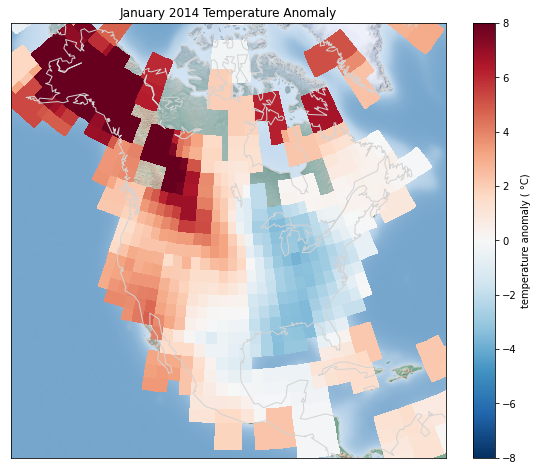

In [13]:
# 예제: 표면 온도 데이터
from netCDF4 import Dataset
data = Dataset("gistemp250.nc")

from netCDF4 import date2index
from datetime import datetime
timeindex = date2index(datetime(2014, 1, 15),
                       data.variables["time"])

lat = data.variables["lat"][:]
lon = data.variables["lon"][:]
lon, lat = np.meshgrid(lon, lat)
temp_anomaly = data.variables["tempanomaly"][timeindex]

fig = plt.figure(figsize=(10, 8))
m = Basemap(projection="lcc", resolution="c",
            width=8E6, height=8E6,
            lat_0=45, lon_0=-100,)

m.shadedrelief(scale=0.5)
m.pcolormesh(lon, lat, temp_anomaly,
             latlon=True, cmap="RdBu_r")
plt.clim(-8, 8)
m.drawcoastlines(color="lightgray")

plt.title("January 2014 Temperature Anomaly")
plt.colorbar(label="temperature anomaly ( °C)");